<a href="https://colab.research.google.com/github/ortall0201/Spotify-Playlist-Recommender-System-Using-NLP/blob/main/Manor/Spotify_playlist_EDA_Basic_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primary Data Structuring
* Dataset structure consists of four columns - user_id, artist, track name, and playlist name - given by the user
* Nevertheless it appeard that original file consisted of rows which some had many hyphens and quotation marks, making them appear as being of more or less than 4 columns.
* This was dealt with keeping the lines that were made of four elements, and then ensuring each element was indeed what it was intended to be.



This section focuses on preparing the dataset for further processing by addressing formatting issues and ensuring data consistency. The dataset initially contained four key columns: user_id, artist_name, track_name, and playlist_name. However, several formatting challenges were identified and resolved through the following steps:

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
csv_file_path = '/content/drive/My Drive/Colab Notebooks/Final Project/spotify_dataset.csv'

Mounted at /content/drive


## First step - keeping rows of 4 elements only

* Goal: Eliminate rows with incorrect formatting caused by missing or extra fields.
* Logic: Each row was checked to ensure it contained exactly four elements.
Rows not meeting this criterion were excluded.


In [ ]:
import csv

# First step - keeping rows of 4 elements only

# List to store valid rows
valid_rows = []

# Open the CSV file and filter for rows with 4 columns
with open(csv_file_path, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    headers = next(reader)  # Read the header
    for row in reader:
        if len(row) == 4:  # Keep only rows with exactly 4 columns
            valid_rows.append(row)

# Convert valid rows to a DataFrame
df_valid = pd.DataFrame(valid_rows, columns=headers)

print(len(df_valid))

# Display the first few rows
df_valid.head()



12890475


,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


## Second step - Dealing with single quotation marks (sign of corrupt line)

* Issue: Some rows contained misplaced or duplicate quotation marks, leading to data corruption.
* Solution: Rows containing single quotation marks (") were identified and removed.


In [ ]:
# Second step - Dealing with single quotation marks (sign of corrupt line)

# Remove adjacent double quotation marks ("") in all rows and columns
df_cleaned = df_valid.applymap(lambda x: x.replace('""', '') if isinstance(x, str) else x)

# Filter rows where any column contains a single quotation mark - sign of a corrupted line (")
rows_with_quotes = df_cleaned[df_cleaned.apply(lambda x: x.astype(str).str.contains('"').any(), axis=1)]

# Count the number of corrupted rows
print(f"Number of rows containing single quotation mark: {len(rows_with_quotes)}")

# Display df after cleaning
rows_with_quotes

<ipython-input-4-06fd0373b33a>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_valid.applymap(lambda x: x.replace('""', '') if isinstance(x, str) else x)


Number of rows containing single quotation mark: 67072


,user_id,"""artistname""","""trackname""","""playlistname"""
304,07f0fc3be95dcd878966b1f9572ff670,Wolfgang Amadeus Mozart,"Serenade No. 13 in G Major, K. 525 Eine Kleine...",Classique
305,07f0fc3be95dcd878966b1f9572ff670,Ludwig van Beethoven,"Sonata No. 23 In F Minor, Op. 57 Appassionata""...",Classique
849,07f0fc3be95dcd878966b1f9572ff670,Sequoia Bisquits,Memories of green (from Squaresoft's Chrono Tr...,Starred
2037,944c80d26922ae634d6ce445b1fdff7f,"Matthew Mdot"" Finley""",Fire,Starred
2245,944c80d26922ae634d6ce445b1fdff7f,"Matthew Mdot"" Finley""",Tear It Down,Starred
...,...,...,...,...
12889469,488ead471813ae982119153f792e4a3e,Cher,You Haven't Seen the Last of Me (Almighty Radi...,Happy Atlanta Pride 2011!
12889578,488ead471813ae982119153f792e4a3e,"Atif Aslam, Pritam & Sunidhi Chauhan","Be Intehaan (From Race 2"")""",Mom's Indian Songs
12889579,488ead471813ae982119153f792e4a3e,Kanika Kapoor,"Chhil Gaye Naina (From NH10"")""",Mom's Indian Songs
12889584,488ead471813ae982119153f792e4a3e,Jeet Gannguli,"Khamoshiyan (From Khamoshiyan"")""",Mom's Indian Songs


In [ ]:
# Subtract rows_with_quotes from df_cleaned
df_no_quotes = df_cleaned[~df_cleaned.index.isin(rows_with_quotes.index)]

# Display the result
print(df_no_quotes)

# Count the number of remaining rows
print(f"Number of rows in clean dataset: {len(df_no_quotes)}")


                                   user_id                      "artistname"  \
0         9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1         9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2         9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3         9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4         9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
...                                    ...                               ...   
12890470  2302bf9c64dc63d88a750215ed187f2c                       Mötley Crüe   
12890471  2302bf9c64dc63d88a750215ed187f2c                       John Lennon   
12890472  2302bf9c64dc63d88a750215ed187f2c                         Tom Petty   
12890473  2302bf9c64dc63d88a750215ed187f2c                         Tom Petty   
12890474  2302bf9c64dc63d88a750215ed187f2c                          Skid Row   

                                       

## Standartization of song texts

* Goal: Normalize non-ASCII characters (e.g., accented characters) to ensure consistency across the dataset.
* Tool Used: The unidecode library was used to convert all text to ASCII.
* Impact: This step ensured that text from various languages and encodings was unified.

In [ ]:
pip install unidecode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
# Third step - Standartizing text to ASCII

import unidecode

# Function to remove non-ASCII characters
def unify_to_ascii(text):
    if isinstance(text, str):
        return unidecode.unidecode(text)
    return text

# Apply to the entire DataFrame
df_cleaned_final = df_no_quotes.applymap(unify_to_ascii)

# Display a sample
print(df_cleaned_final.head())


<ipython-input-8-19b70c0c1fc2>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned_final = df_no_quotes.applymap(unify_to_ascii)


                            user_id                      "artistname"  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   

                                         "trackname"  "playlistname"  
0               (The Angels Wanna Wear My) Red Shoes  HARD ROCK 2010  
1  (What's So Funny 'Bout) Peace, Love And Unders...  HARD ROCK 2010  
2                                   7 Years Too Late  HARD ROCK 2010  
3                              Accidents Will Happen  HARD ROCK 2010  
4                                             Alison  HARD ROCK 2010  


## Saving Intermediate Outputs
* Purpose: To avoid overloading RAM and allow processing to resume seamlessly after runtime resets.
* Logic: The cleaned dataset was saved to disk for reloading as needed.

In [ ]:
# optional step, to handle RAM overload and crash

output_file_path = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step2.csv'
df_cleaned_final.to_csv(output_file_path, index=False)

# reset runtime

In [ ]:
# optional step after resetting runtime

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df_cleaned_final = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step2.csv'

Mounted at /content/drive


## Final Adjustments
* Column Renaming: Standardized column names to reflect their content accurately (user_id, artist_name, track_name, playlist_name).
* Verification: Random samples of the cleaned dataset were inspected for consistency.

In [ ]:
df_cleaned_final = pd.read_csv(df_cleaned_final)

In [ ]:
# 4th step - Adjusting column names

df_cleaned_final.columns = ['user_id', 'artist_name', 'track_name', 'playlist_name']


In [ ]:
df_cleaned_final.sample(5)

,user_id,artist_name,track_name,playlist_name
7850139,00909b16e60501d9da9acf7bd2c5b00d,Clifford Brown & Max Roach Quintet,I Don't Stand A Ghost Of A Chance With You,Brownie Speaks with others
11493754,5711c5c6e1e476930378248a69f4f4a3,Florence + The Machine,Dog Days are Over,happy happy love time
10033549,9ff7ed4b2a9864fa42524ea0ce787e34,REO Speedwagon,Keep On Loving You,Vice City - Emotion 98.3
4870277,767bd9e933b8a46e56df7a8802049ec9,Monty,Turn To Me - Original Mix,Dub Step Collection
2456461,5f801dc79f3c9012505226b71fa44fb5,Alkaline Trio,Private Eye,DK Favorites


# Data Cleaning and preliminary preprocessing

This section focuses on cleaning and preparing the dataset to ensure uniformity, remove noise, and derive features critical for the recommendation task. These steps address missing values, duplicates, inconsistent text formats, and unnecessary noise.

1. Handling Missing Values
* Goal: Remove rows containing missing values to maintain data integrity.
* Logic: Use dropna() to eliminate rows with null entries in any column.
2. Lowercasing Text
* Goal: Standardize string data for case-insensitive matching.
* Logic: Convert all string columns (e.g., artist names, track names, playlist names) to lowercase.
3. Removing Duplicate Rows
* Goal: Eliminate duplicate entries to reduce redundancy and avoid over-representing certain data points.
* Logic: Use drop_duplicates() to identify and remove duplicate rows.
4. Removing One-Character Artist and Track Names
* Goal: Remove invalid or noise entries, such as artist names or track names that are too short to be meaningful.
* Logic: Filter out rows where artist_name or track_name is less than 2 characters.

In [ ]:
#Data Cleaning and lowercasing

import pandas as pd

# Step 1: Handle missing values
print(f"Shape Before Cleaning {df_cleaned_final.shape}")
df_cleaned_final = df_cleaned_final.dropna()  # Remove rows with missing values
print(f"Shape After Dropping NA {df_cleaned_final.shape}")
print("")

# Step 2: Convert all string columns to lowercase
string_columns = df_cleaned_final.select_dtypes(include='object').columns  # Identify string columns
df_cleaned_final[string_columns] = df_cleaned_final[string_columns].apply(lambda col: col.str.lower())
print(f"Shape After Converting to Lowercase {df_cleaned_final.shape}")
print("")

# Step 3: Remove duplicate Rows
print(f"Number of duplicate rows: {df_cleaned_final.duplicated().sum()}")
df_cleaned_final = df_cleaned_final.drop_duplicates()
print(f"Shape After Dropping Duplicates {df_cleaned_final.shape}")
print("")

# Step 4: Removing one-char artists and track names
print(df_cleaned_final[df_cleaned_final['artist_name'].str.len() < 2])  # Artists with very short names
print(df_cleaned_final[df_cleaned_final['track_name'].str.len() < 2])  # Tracks with very short names
df_cleaned_final = df_cleaned_final[df_cleaned_final['artist_name'].str.len() >= 2]
df_cleaned_final = df_cleaned_final[df_cleaned_final['track_name'].str.len() >= 2]
print(f"Shape After Removing Short Artists and Tracks {df_cleaned_final.shape}")
print("")




Shape Before Cleaning (12823403, 4)
Shape After Dropping NA (12779965, 4)

Shape After Converting to Lowercase (12779965, 4)

Number of duplicate rows: 29505
Shape After Dropping Duplicates (12750460, 4)

                                   user_id artist_name  \
14108     650c4d63a819dbb77cc15a87f407039a               
45019     db937456654d2465292c4daa947c95de           m   
49502     db937456654d2465292c4daa947c95de           t   
51893     db937456654d2465292c4daa947c95de           m   
77239     6cdb890a9fff57be31b072777350e632           x   
...                                    ...         ...   
12785766  675687eafb4c14f1ea561e6089ee2ec0           x   
12786002  675687eafb4c14f1ea561e6089ee2ec0           x   
12786173  675687eafb4c14f1ea561e6089ee2ec0           x   
12786684  675687eafb4c14f1ea561e6089ee2ec0           x   
12787412  675687eafb4c14f1ea561e6089ee2ec0           x   

                                         track_name          playlist_name  
14108                

## Adding new features
* song_name: Combines artist_name and track_name into a unified identifier for each song.
> Example: artist_name = 'adele', track_name = 'hello' → song_name = 'adele - hello'
* unq_playlist_name: Combines user_id and playlist_name into a unique identifier for each playlist.
> Example: user_id = 'user123', playlist_name = 'my hits' → unq_playlist_name = 'user123 - my hits'

In [ ]:
# New Feature - song name = artist + track

df_cleaned_final['song_name'] = df_cleaned_final['artist_name'] + ' - ' + df_cleaned_final['track_name']
unique_songs = df_cleaned_final['song_name'].nunique()



In [ ]:
print(f"Number of unique songs: {unique_songs}")

Number of unique songs: 2658530


In [ ]:
# New Feature unq_playlist_name = user_id + playlist

df_cleaned_final['unq_playlist_name'] = df_cleaned_final['user_id'] + ' - ' + df_cleaned_final['playlist_name']
unique_playlists = df_cleaned_final['unq_playlist_name'].nunique()
print(f"Number of unique playlists: {unique_playlists}")

Number of unique playlists: 230708


In [ ]:
# optional step, to handle RAM overload and crash

output_file_path = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step3.csv'
df_cleaned_final.to_csv(output_file_path, index=False)

# reset runtime

# Optional Starting point - Call the current preprocesed data from here



In [1]:
import pandas as pd

# otside users should download the following file to your drive and uploade it as "df_cleaned_final"
# file link: https://drive.google.com/file/d/1zTEsmlHihMUmWNw90VDIvnK5s8SvJgLH/view?usp=sharing
# Then correct the file path accordingly

from google.colab import drive
drive.mount('/content/drive')
df_cleaned_final = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step3.csv'
df_cleaned_final = pd.read_csv(df_cleaned_final)


Mounted at /content/drive


In [2]:
df_cleaned_final.shape

(12744063, 6)

# Numbers and Distributions
This section provides insights into the dataset's composition and distributions, highlighting key metrics like the number of unique users, artists, songs, and playlists. Additionally, it explores playlist diversity, songs per artist, and playlist lengths through statistical summaries and visualizations.



In [ ]:
# Number of unique artists

df_cleaned_final['artist_name'].nunique()
print(f"Number of unique artists: {df_cleaned_final['artist_name'].nunique()}")

# Number of unique users

unique_users = df_cleaned_final['user_id'].nunique()
print(f"Number of unique users: {unique_users}")

# Number of unique songs

unique_songs = df_cleaned_final['song_name'].nunique()
print(f"Number of unique songs: {unique_songs}")

Number of unique artists: 279658
Number of unique users: 15898


## Songs per playlists

In [ ]:
# Songs per playlists
songs_per_playlist = df_cleaned_final.groupby(['unq_playlist_name'])['song_name'].nunique()

# Descriptive statistics
mean_songs = songs_per_playlist.mean()
mode_songs = songs_per_playlist.mode()
quantiles = songs_per_playlist.quantile([0.25, 0.5, 0.75])

print(f"Mean songs per playlist: {mean_songs:.2f}")
print(f"Mode songs per playlist: {mode_songs}")
print(f"25th percentile: {quantiles[0.25]}, Median: {quantiles[0.5]}, 75th percentile: {quantiles[0.75]}")


Mean songs per playlist: 55.24
Mode songs per playlist: 0    12
Name: song_name, dtype: int64
25th percentile: 11.0, Median: 16.0, 75th percentile: 38.0


In [ ]:
# Playlist Diversity
playlist_diversity = df_cleaned_final.groupby('unq_playlist_name')['song_name'].nunique()
print(playlist_diversity.describe())

count    230708.000000
mean         55.238930
std         269.603424
min           1.000000
25%          11.000000
50%          16.000000
75%          38.000000
max       47259.000000
Name: song_name, dtype: float64


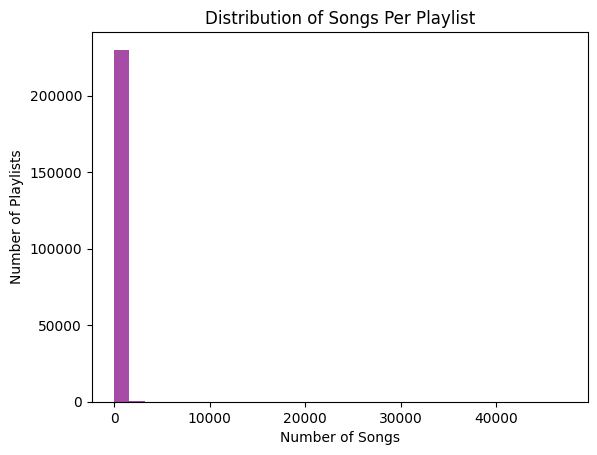

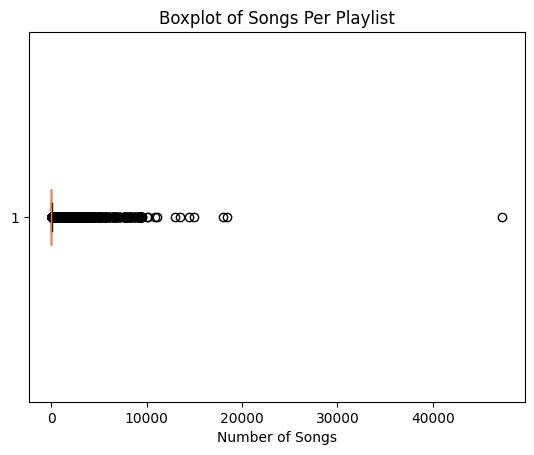

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Histogram for song distribution
plt.hist(songs_per_playlist, bins=30, color='purple', alpha=0.7)
plt.title("Distribution of Songs Per Playlist")
plt.xlabel("Number of Songs")
plt.ylabel("Number of Playlists")
plt.show()

# Boxplot for song distribution
plt.boxplot(songs_per_playlist, vert=False, patch_artist=True, boxprops=dict(color="navy"))
plt.title("Boxplot of Songs Per Playlist")
plt.xlabel("Number of Songs")
plt.show()


## Songs per artist

In [ ]:
track_details_per_artist = df_cleaned_final.groupby('artist_name').agg({'song_name': ['nunique', list]})
track_details_per_artist.columns = ['unique_song_count', 'song_names_list']

# Sort in descending order (most songs first)
sorted_by_song_count_desc = track_details_per_artist.sort_values(by='unique_song_count', ascending=False)
sorted_by_song_count_desc.head(10)

,unique_song_count,song_names_list
artist_name,,
various artists,6725,"[various artists - i fancy laura marling, vari..."
johann sebastian bach,6303,"[johann sebastian bach - air, johann sebastian..."
wolfgang amadeus mozart,4510,[wolfgang amadeus mozart - piano sonata no. 11...
vitamin string quartet,3597,[vitamin string quartet - jack and sally monta...
grateful dead,3378,[grateful dead - box of rain - remastered vers...
frank sinatra,2966,"[frank sinatra - serenade in blue, frank sinat..."
ella fitzgerald,2845,"[ella fitzgerald - dream a little dream of me,..."
ludwig van beethoven,2425,"[ludwig van beethoven - fur elise, ludwig van ..."
lata mangeshkar,2419,"[lata mangeshkar - tujhe dekha to yeh, lata ma..."


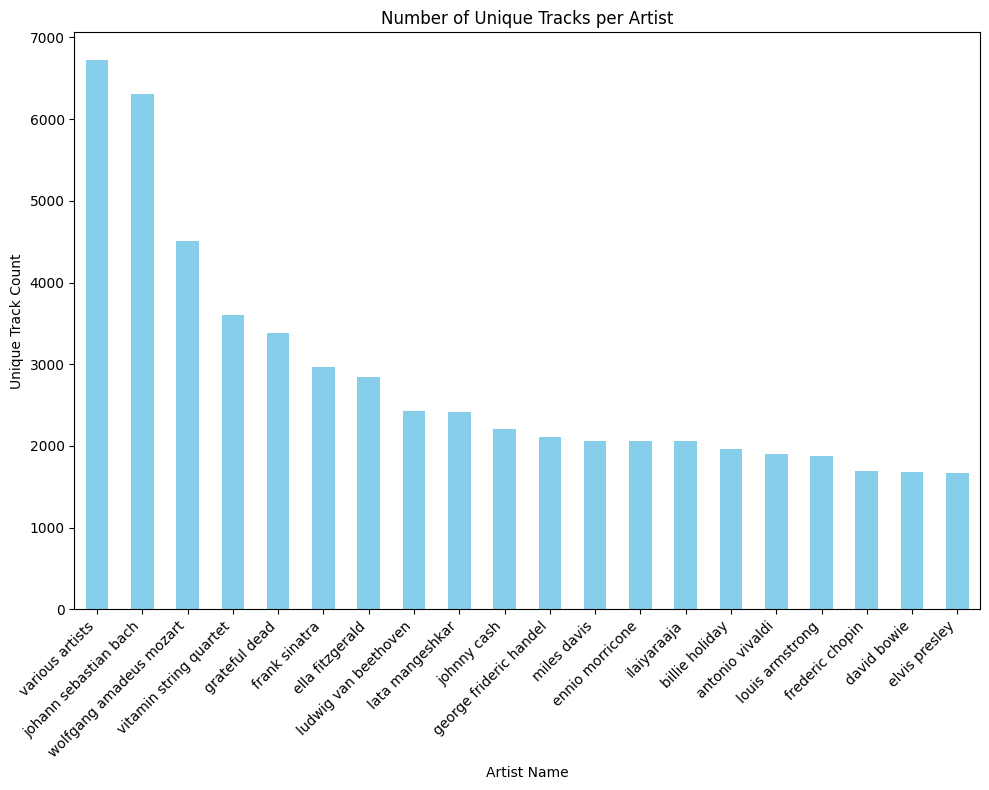

In [ ]:
from matplotlib import pyplot as plt

# Plotting the sorted data
plt.figure(figsize=(10, 8))  # You can adjust the figure size if needed
sorted_by_song_count_desc['unique_song_count'].head(20).plot(kind='bar', color='skyblue')  # Plot top 20 artists

plt.title('Number of Unique Tracks per Artist')
plt.xlabel('Artist Name')
plt.ylabel('Unique Track Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## Playlists Lengths

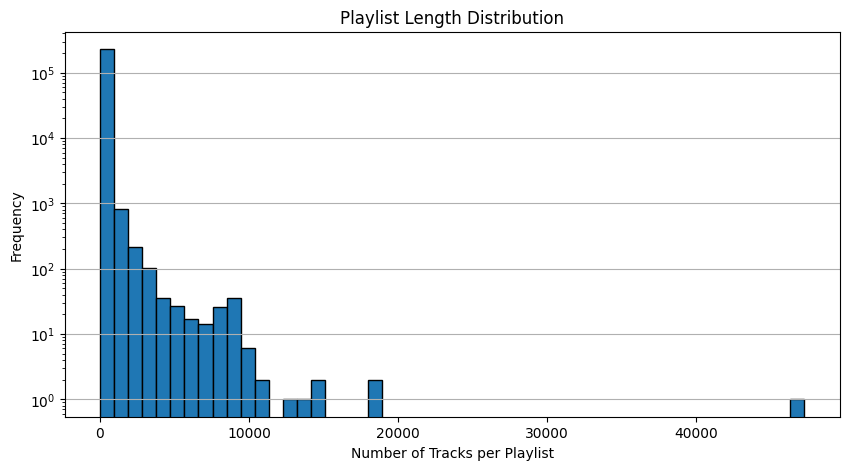

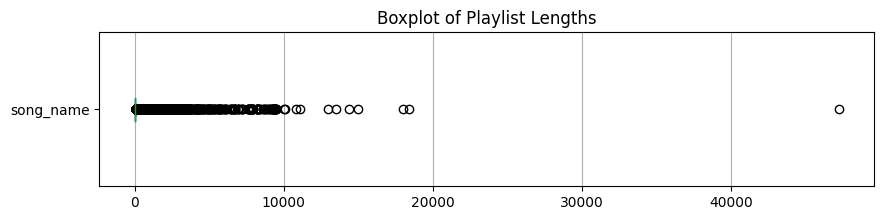

Playlist Length Statistics:
count    230708.000000
mean         55.238930
std         269.603424
min           1.000000
25%          11.000000
50%          16.000000
75%          38.000000
max       47259.000000
Name: song_name, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Calculate playlist lengths
playlist_lengths = df_cleaned_final.groupby('unq_playlist_name')['song_name'].count()

# Save the playlist lengths for reference
playlist_lengths.to_csv('playlist_lengths.csv')

# Plot histogram for playlist lengths
plt.figure(figsize=(10, 5))
playlist_lengths.plot(kind='hist', bins=50, edgecolor='black', logy=True)
plt.title('Playlist Length Distribution')
plt.xlabel('Number of Tracks per Playlist')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 2))
playlist_lengths.plot(kind='box', vert=False)
plt.title('Boxplot of Playlist Lengths')
plt.grid(axis='x')
plt.show()

# Basic statistics of playlist lengths
print("Playlist Length Statistics:")
print(playlist_lengths.describe())


# Further preprocessing

* Remove Extreme Outliers:

>> Playlists with unusually long lengths (beyond the 99th percentile) may distort the model's understanding of typical user behavior and introduce bias. These are excluded to focus on representative playlists.
Preserve Data Integrity:

>> To avoid over-pruning, we retain playlists with at least 3 songs, ensuring that even smaller, valid playlists are included in the dataset.

* This approach strikes a balance between:

>> Removing noise: Outliers that may mislead the model.

>> Maximizing data usage: Keeping the majority of playlists intact for robust training and analysis.

In [3]:
# Calculate the length of each playlist
playlist_lengths = df_cleaned_final.groupby('unq_playlist_name')['song_name'].count()

# Calculate the 99th percentile of playlist lengths
max_length_threshold = playlist_lengths.quantile(0.99)
print(f"99th Percentile of Playlist Length: {max_length_threshold}")

# Filter playlists with at least 3 songs and within the 99th percentile length
valid_playlists = playlist_lengths[
    (playlist_lengths >= 3) & (playlist_lengths <= max_length_threshold)
].index

# Keep only valid playlists in the dataset
df_filtered = df_cleaned_final[df_cleaned_final['unq_playlist_name'].isin(valid_playlists)]

print(f"Shape after filtering playlists: {df_filtered.shape}")


99th Percentile of Playlist Length: 625.0
Shape after filtering playlists: (8827817, 6)


Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 8827817 entries, 0 to 12744062
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   user_id            object
 1   artist_name        object
 2   track_name         object
 3   playlist_name      object
 4   song_name          object
 5   unq_playlist_name  object
dtypes: object(6)
memory usage: 471.5+ MB
None


Summary Statistics:
                                 user_id artist_name track_name playlist_name  \
count                            8827817     8827816    8827808       8827817   
unique                             15351      223713    1366395        133933   
top     11da254d9d1948488318e3ea286bf484   daft punk      intro       starred   
freq                                9818       28885       5553        444558   

                  song_name                            unq_playlist_name  
count               8827817                                      8827817  


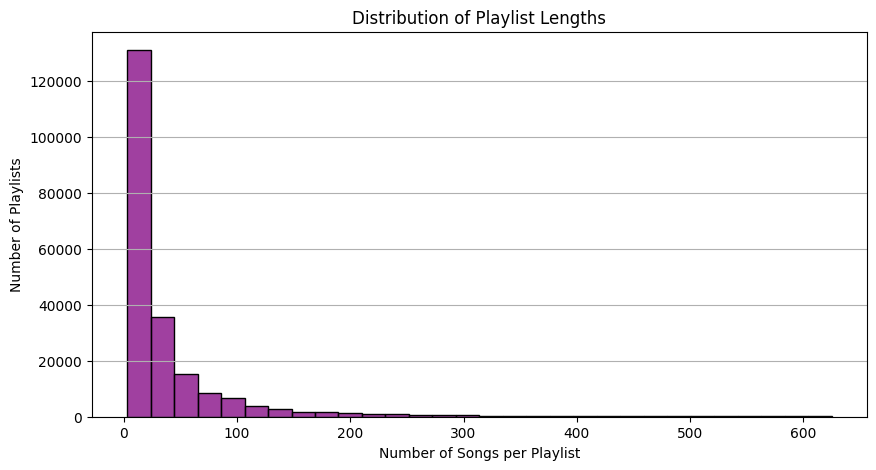

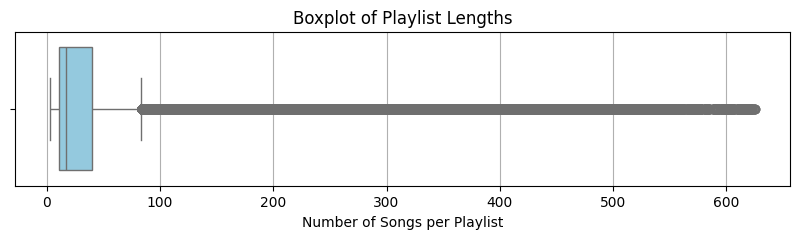

Top 10 Most Frequent Artists:
artist_name
daft punk             28885
coldplay              27654
jay z                 22575
kanye west            22162
eminem                22065
radiohead             20774
michael jackson       20543
queen                 19630
rihanna               19124
the rolling stones    18959
Name: count, dtype: int64


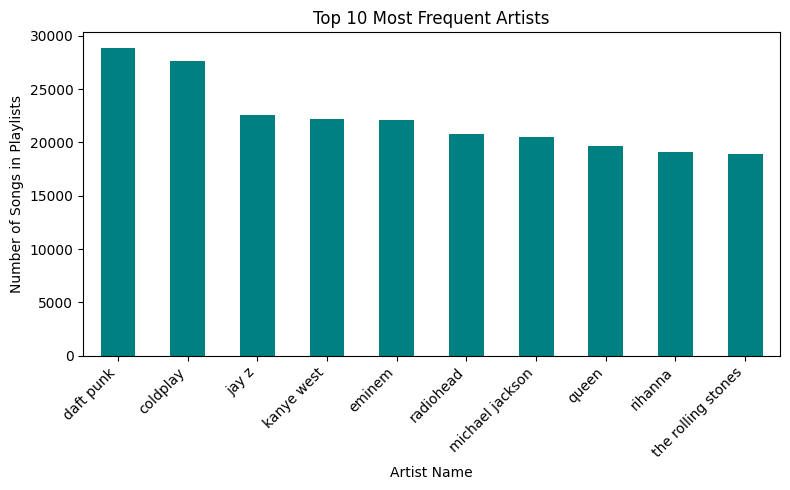

Top 10 Most Frequent Songs:
song_name
m83 - midnight city                                           2256
daft punk - get lucky - radio edit                            2065
imagine dragons - radioactive                                 2059
avicii - wake me up                                           2054
lorde - royals                                                1968
of monsters and men - little talks                            1950
the lumineers - ho hey                                        1889
macklemore & ryan lewis - can't hold us - feat. ray dalton    1856
bastille - pompeii                                            1807
robin thicke - blurred lines                                  1785
Name: count, dtype: int64


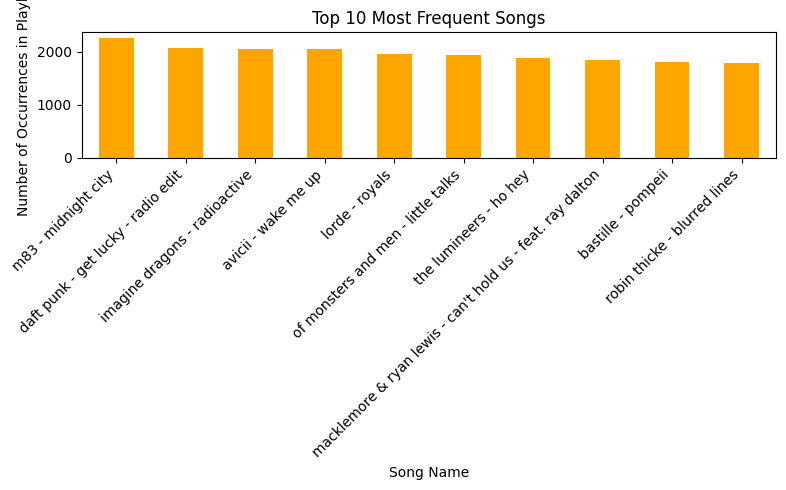

In [4]:
# Basic Information about the Dataset
print("Basic Information:")
print(df_filtered.info())
print("\n")

# Summary Statistics for Numerical Columns
print("Summary Statistics:")
print(df_filtered.describe(include='all'))  # Includes numerical and categorical columns
print("\n")

# Count of Unique Values in Key Columns
print(f"Number of unique users: {df_filtered['user_id'].nunique()}")
print(f"Number of unique artists: {df_filtered['artist_name'].nunique()}")
print(f"Number of unique songs: {df_filtered['song_name'].nunique()}")
print(f"Number of unique playlists: {df_filtered['unq_playlist_name'].nunique()}")
print("\n")

# Distribution of Playlist Lengths
playlist_lengths = df_filtered.groupby('unq_playlist_name')['song_name'].count()
print("Playlist Length Statistics:")
print(playlist_lengths.describe())

# Visualize Playlist Length Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Playlist Lengths
plt.figure(figsize=(10, 5))
sns.histplot(playlist_lengths, bins=30, kde=False, color='purple', edgecolor='black')
plt.title("Distribution of Playlist Lengths")
plt.xlabel("Number of Songs per Playlist")
plt.ylabel("Number of Playlists")
plt.grid(axis='y')
plt.show()

# Boxplot of Playlist Lengths
plt.figure(figsize=(10, 2))
sns.boxplot(x=playlist_lengths, color='skyblue')
plt.title("Boxplot of Playlist Lengths")
plt.xlabel("Number of Songs per Playlist")
plt.grid(axis='x')
plt.show()

# Top 10 Most Frequent Artists
top_artists = df_filtered['artist_name'].value_counts().head(10)
print("Top 10 Most Frequent Artists:")
print(top_artists)

# Bar Plot for Top Artists
plt.figure(figsize=(8, 5))
top_artists.plot(kind='bar', color='teal')
plt.title("Top 10 Most Frequent Artists")
plt.xlabel("Artist Name")
plt.ylabel("Number of Songs in Playlists")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Most Frequent Songs
top_songs = df_filtered['song_name'].value_counts().head(10)
print("Top 10 Most Frequent Songs:")
print(top_songs)

# Bar Plot for Top Songs
plt.figure(figsize=(8, 5))
top_songs.plot(kind='bar', color='orange')
plt.title("Top 10 Most Frequent Songs")
plt.xlabel("Song Name")
plt.ylabel("Number of Occurrences in Playlists")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Save final preprocessed data

In [ ]:
# Save final preprocessed data

output_file_path = '/content/drive/My Drive/Colab Notebooks/Final Project/cleaned_step3.csv'
df_cleaned_final.to_csv(output_file_path, index=False)